<h5>Importing libraries</h5>

In [54]:
# data handling
import pandas as pd
import numpy as np
import os 
from PIL import Image

# Machine learning (non deep learning)
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder 
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay


# Deep learning
import tensorflow as tf
import keras
from keras import layers
from keras_preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

# plotting
import seaborn as sns
import matplotlib.pyplot as plt

# misc
import time

<h5>Read in images into numpy arrays and record type of tumor with one hot encoder</h5>

In [55]:
img_reshape_size = (32,32)

data = []
result = []

encoder = OneHotEncoder()
encoder.fit([[0], [1]]) 

# path to tumor files
tumor_image_dir = "dataset/split_data/binary/tumor"
tumor_files = os.listdir(tumor_image_dir)

# path to non tumor files
no_tumor_image_dir = "dataset/split_data/binary/no_tumor"
no_tumor_files = os.listdir(no_tumor_image_dir)

for file in tumor_files:
    temp_file_path = "dataset/split_data/binary/tumor/"+file
    img = Image.open(temp_file_path).convert('L')
    img = img.resize(img_reshape_size)
    img = np.array(img)
    data.append(np.array(img))
    result.append(encoder.transform([[1]]).toarray())
        

for file in no_tumor_files:
    temp_file_path = "dataset/split_data/binary/no_tumor/"+file
    img = Image.open(temp_file_path).convert('L')
    img = img.resize(img_reshape_size)
    img = np.array(img)
    data.append(np.array(img))
    result.append(encoder.transform([[0]]).toarray())

<h5>Reshape data and split between test and train data</h5>

In [56]:
data = np.array(data)
print(data.shape)

result = np.array(result)
result = result.reshape(3000,2)

x_train,x_test,y_train,y_test = train_test_split(data, result, test_size=0.1, shuffle=True, random_state=0)

(3000, 32, 32)


<h5>Build the CNN model</h5>

In [57]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

model = Sequential()

model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(32, 32, 1), padding = 'Same'))
model.add(Conv2D(32, kernel_size=(2, 2),  activation ='relu', padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss = "categorical_crossentropy", optimizer='Adamax',  metrics = ['accuracy'])
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 32, 32, 32)        160       
                                                                 
 conv2d_17 (Conv2D)          (None, 32, 32, 32)        4128      
                                                                 
 batch_normalization_8 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_12 (Dropout)        (None, 16, 16, 32)        0         
                                                                 
 conv2d_18 (Conv2D)          (None, 16, 16, 64)       

<h5>Train the model and record time to train</h5>

In [58]:
start_time = time.time()
history = model.fit(x_train, y_train, epochs = 300, batch_size = 8, verbose = 1,validation_data = (x_test, y_test), callbacks=[callback])
print("--- %s seconds ---" % (time.time() - start_time))

Epoch 1/300
338/338 [==============================] - 11s 31ms/step - loss: 0.7577 - accuracy: 0.8400 - val_loss: 0.1496 - val_accuracy: 0.9333
Epoch 2/300
338/338 [==============================] - 10s 30ms/step - loss: 0.3292 - accuracy: 0.8863 - val_loss: 0.1482 - val_accuracy: 0.9267
Epoch 3/300
338/338 [==============================] - 11s 31ms/step - loss: 0.2397 - accuracy: 0.9037 - val_loss: 0.1437 - val_accuracy: 0.9333
Epoch 4/300
338/338 [==============================] - 11s 31ms/step - loss: 0.2110 - accuracy: 0.9104 - val_loss: 0.1448 - val_accuracy: 0.9200
Epoch 5/300
338/338 [==============================] - 11s 31ms/step - loss: 0.1810 - accuracy: 0.9274 - val_loss: 0.1091 - val_accuracy: 0.9533
Epoch 6/300
338/338 [==============================] - 10s 30ms/step - loss: 0.1614 - accuracy: 0.9381 - val_loss: 0.0879 - val_accuracy: 0.9567
Epoch 7/300
338/338 [==============================] - 12s 36ms/step - loss: 0.1447 - accuracy: 0.9374 - val_loss: 0.0907 - val_ac

338/338 [==============================] - 11s 31ms/step - loss: 0.0054 - accuracy: 0.9981 - val_loss: 0.0598 - val_accuracy: 0.9833
Epoch 58/300
338/338 [==============================] - 11s 32ms/step - loss: 0.0096 - accuracy: 0.9981 - val_loss: 0.0577 - val_accuracy: 0.9900
Epoch 59/300
338/338 [==============================] - 12s 35ms/step - loss: 0.0034 - accuracy: 0.9981 - val_loss: 0.0454 - val_accuracy: 0.9833
Epoch 60/300
338/338 [==============================] - 11s 32ms/step - loss: 0.0040 - accuracy: 0.9981 - val_loss: 0.0706 - val_accuracy: 0.9800
--- 644.4222147464752 seconds ---


<h6>Some basic results recording, just for keeping information to hand</h6>

30.509965896606445 seconds --- 30 epochs , 0.9683 acc , 16x16 Greyscale image <br>
86.94418954849243 seconds --- 30 epochs , 0.9783 acc , 32x32 Greyscale image <br>
169.6840739250183 seconds --- 60 epochs , 0.9667 acc , 32x32 Greyscale image <br>
335.7380225658417 seconds --- 30 epochs , 0.9700 acc , 64x64 Greyscale image <br>


In [59]:
history.history

{'loss': [0.7576987743377686,
  0.3292331099510193,
  0.23969227075576782,
  0.21103911101818085,
  0.18104632198810577,
  0.16141533851623535,
  0.14472611248493195,
  0.13103416562080383,
  0.10688211768865585,
  0.10664375871419907,
  0.08467413485050201,
  0.0803106427192688,
  0.0752265602350235,
  0.07120727002620697,
  0.05505141615867615,
  0.055509503930807114,
  0.06214575469493866,
  0.05160576105117798,
  0.043023329228162766,
  0.03452669084072113,
  0.03995125740766525,
  0.038110047578811646,
  0.031003421172499657,
  0.026894180104136467,
  0.038573723286390305,
  0.02960056997835636,
  0.025307323783636093,
  0.01740870624780655,
  0.018537625670433044,
  0.01826857030391693,
  0.020282190293073654,
  0.017336884513497353,
  0.016583295539021492,
  0.02018897794187069,
  0.015087105333805084,
  0.019368402659893036,
  0.013826824724674225,
  0.016946813091635704,
  0.008542112074792385,
  0.006397400517016649,
  0.011472092010080814,
  0.006914051715284586,
  0.0137062

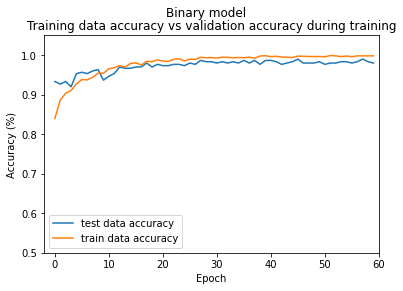

In [78]:
plt.plot(history.history['val_accuracy'], label="test data accuracy")
plt.plot(history.history['accuracy'], label="train data accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.suptitle('Binary model')
plt.title('Training data accuracy vs validation accuracy during training')
ax = plt.gca()
ax.set_xlim([-2, 60])
ax.set_ylim([0.5, 1.05])
plt.legend()
plt.show()

<h5>Read in the validation data in the same way we read in the training and testing data</h5>

In [61]:
img_reshape_size = (32,32)

validation_data = []
validation_result = []

# path to non tumor files
no_tumor_image_dir = "test_dataset/test/split_data/binary/no_tumor"
no_tumor_files = os.listdir(no_tumor_image_dir)

# path to tumor files
tumor_image_dir = "test_dataset/test/split_data/binary/tumor"
tumor_files = os.listdir(tumor_image_dir)

test_encoder = OneHotEncoder()
test_encoder.fit([[0], [1]]) 

for file in no_tumor_files:
    temp_file_path = "test_dataset/test/split_data/binary/no_tumor/"+file
    #print("path is " +temp_file_path)
    img = Image.open(temp_file_path).convert('L') # not an RGB image so import as greyscale
    img = img.resize(img_reshape_size)
    img = np.array(img)
    validation_data.append(np.array(img))
    validation_result.append(test_encoder.transform([[0]]).toarray())

for file in tumor_files:
    temp_file_path = "test_dataset/test/split_data/binary/tumor/"+file
    img = Image.open(temp_file_path).convert('L')
    img = img.resize(img_reshape_size)
    img = np.array(img)
    validation_data.append(np.array(img))
    validation_result.append(test_encoder.transform([[1]]).toarray())   

<h5>reshape validation data</h5>

In [62]:
validation_data = np.array(validation_data)
validation_result = np.array(validation_result)
validation_result = validation_result.reshape(200,2)

<h5>Get and print scores</h5>

In [63]:
scores = model.evaluate(validation_data, validation_result, verbose=10)

In [64]:
print("test loss: " + str(scores[0]))
print("test accuracy: " + str(scores[1]))

test loss: 0.08173271268606186
test accuracy: 0.9800000190734863


In [65]:
predictions = model.predict(validation_data)

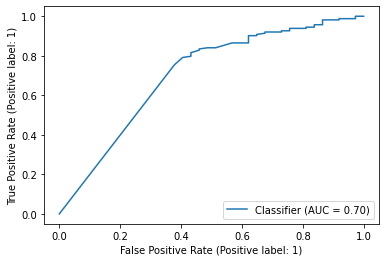

In [66]:
RocCurveDisplay.from_predictions(np.argmax(validation_result, axis=1), np.max(predictions, axis=1)) 

In [75]:
for i in range(len(validation_result)):
    img = np.expand_dims(validation_data[i], axis = 0)
    if (np.argmax(model.predict(img)) != np.argmax(validation_result[i])):
        print(str(i),np.argmax(model.predict(img)) , np.argmax(validation_result[i]))

26 1 0
46 0 1
62 0 1
98 0 1


In [ ]:
np.argmax(validation_result, axis=1)

In [ ]:
fpr_keras, tpr_keras, thresholds_keras = roc_curve(np.argmax(validation_result, axis=1), np.argmax(predictions, axis=1))

In [ ]:
auc_keras = auc(fpr_keras, tpr_keras)

In [ ]:
np.argmax(validation_result, axis=1)

In [ ]:
np.max(predictions, axis=1)